In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Реализация Ridge регрессии (для визуализации)


In [2]:
random_seed = 43
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 100
coeff = 1e-2

np.random.seed(random_seed)

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 1, n_objects)

In [3]:
np.random.seed(random_seed)
w_0 = np.random.uniform(-2, 2, n_features)-0.5
w = w_0.copy()
w_list = [w.copy()]
lr_0 = 0.02
batch_size = 10

for i in range(num_steps):
    lr = lr_0 / (i//4+1) 
    sample_indices = np.random.randint(n_objects, size=batch_size)
    w -= 2 * lr * (np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) - coeff * w) / batch_size
    w_list.append(w.copy())
w_list = np.array(w_list)

# Визуализация

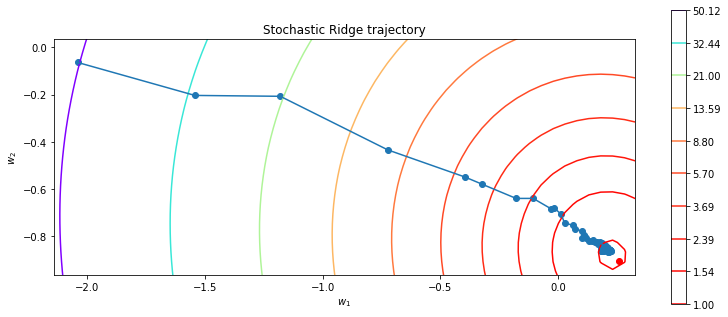

In [4]:
A, B = np.meshgrid(np.linspace(-3, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean(np.power(np.dot(X, w_tmp) - Y, 2))

plt.figure(figsize=(13, 9))
plt.title('Stochastic Ridge trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1))
plt.ylim((w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 1.7, num=10), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.6, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1])

plt.show()

# Реализация в виде класса

In [51]:
from sklearn.base import BaseEstimator, RegressorMixin

class Linear_Ridge (BaseEstimator, RegressorMixin):
    
    def __init__(self, batch_size=20, num_steps=400, lr=0.01, coeff = 0.1):
        self.batch_size = batch_size
        self.num_steps = num_steps
        self.lr = lr
        self.coeff = coeff

    def fit(self, X, Y):
        w = np.random.randn(X.shape[1])[:, None]
        n_objects = len(X)

        learning_rate = self.lr
        for i in range(self.num_steps):
            sample_indices = np.random.randint(n_objects, size=self.batch_size)
            w -= 2 * learning_rate * (np.dot(X[sample_indices].T, np.dot(X[sample_indices], w) - Y[sample_indices]) - self.coeff*w) / self.batch_size

        self.w = w
        return self

    def predict(self, X):
        return X @ self.w

# Сравнение с моделью Ridge из Sklearn

In [52]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

#Генерация данных для тестирования
n_features = 700
n_objects = 100000

w_true = np.random.uniform(-2, 2, (n_features, 1))

X = np.random.uniform(-100, 100, (n_objects, n_features)) * np.arange(n_features)
Y = X.dot(w_true) + np.random.normal(0, 10, (n_objects, 1))
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y)
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
own_model = Linear_Ridge().fit(x_scaled, y_train)
y_pred = own_model.predict(x_test_scaled)
own_r2 = r2_score(y_test, y_pred)

sklearn_model = Ridge().fit(x_scaled, y_train)
y_pred = sklearn_model.predict(x_test_scaled)

sklearn_r2 = r2_score(y_test, y_pred)

print('R^2 in own model:', own_r2)
print('R^2 in sklearn model:', sklearn_r2)

R^2 in own model: 0.9998793813150403
R^2 in sklearn model: 0.9999999996062118
